In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [111]:
df=pd.read_csv('train.csv',index_col=False)

In [112]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [113]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<Axes: ylabel='Density'>

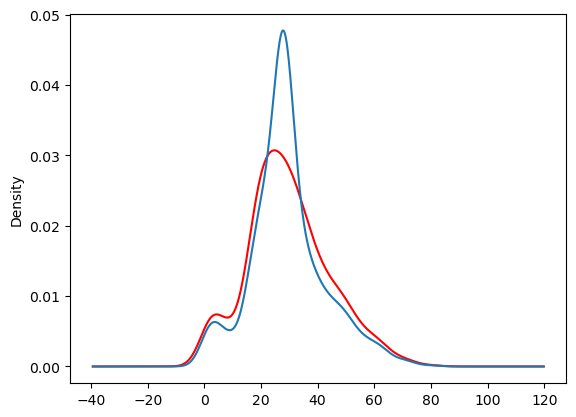

In [114]:
mdeian=df['Age'].median()
df['Age'+'_new']=df['Age'].fillna(mdeian)


ax=plt.subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='red')
df['Age_new'].plot(kind='kde')

<Axes: xlabel='Age_new'>

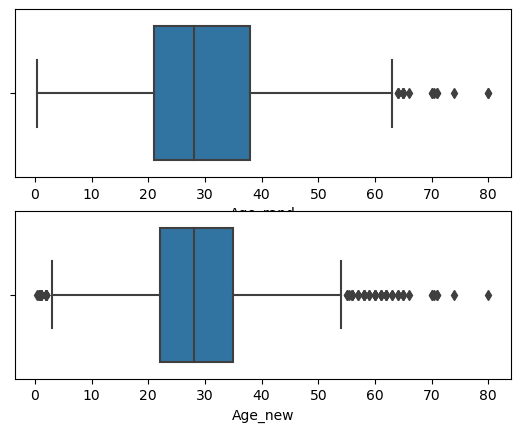

In [117]:
plt.subplot(2,1,1)
sns.boxplot(x='Age_rand',data=df)
plt.subplot(2,1,2)
sns.boxplot(x='Age_new',data=df)

In [116]:
def random_imputation(df,variable):
    df[variable+'_rand']=df[variable]
    rndm=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    rndm.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_rand']=rndm
random_imputation(df,'Age')

<Axes: xlabel='Age'>

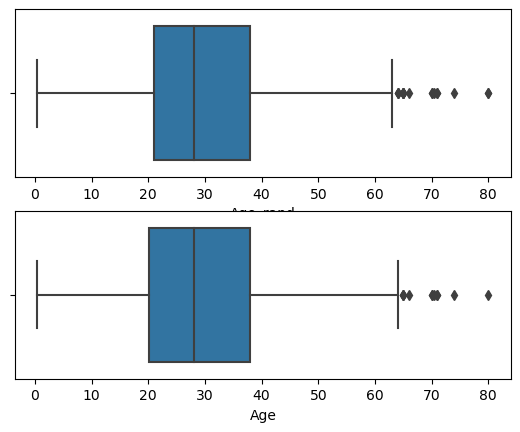

In [118]:
plt.subplot(2,1,1)
sns.boxplot(x='Age_rand',data=df)
plt.subplot(2,1,2)
sns.boxplot(x='Age',data=df)

<Axes: ylabel='Density'>

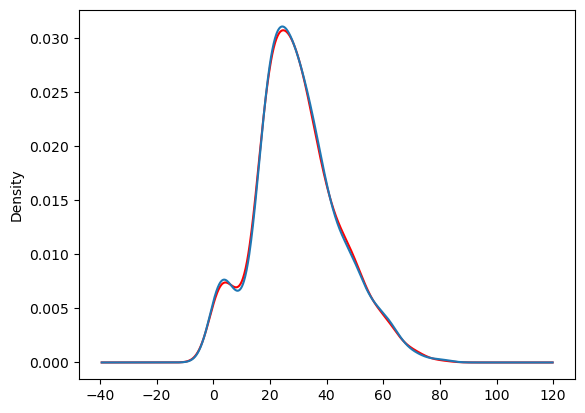

In [119]:
ax=plt.subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='red')
df['Age_rand'].plot(kind='kde')

<Axes: xlabel='Embarked'>

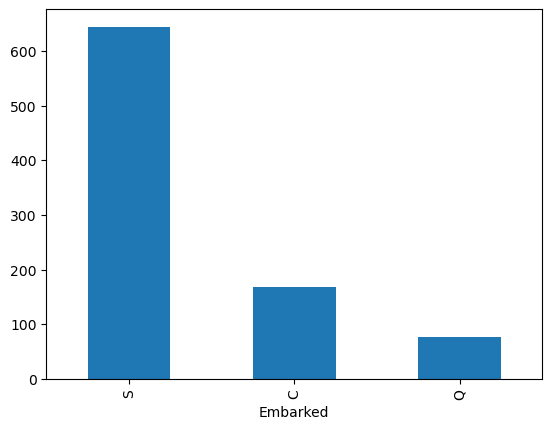

In [120]:
df['Embarked'].value_counts().plot(kind='bar')

In [121]:
def ct_impute(df,variable):
    m=df[variable].mode()[0]
    df[variable]=df[variable].fillna(m)
ct_impute(df,'Embarked')

In [122]:
df['Cabin'+'_new']=np.where(df['Cabin'].isnull(),'Missing',df['Cabin'])
df['Cabin_new']=df['Cabin_new'].astype(str).str[0]
label=df.groupby('Cabin_new')['Survived'].mean().sort_index().index

label1={}
for i,k in enumerate(label,0):
    label1[k]=i

df['Cabin_label']=df['Cabin_new'].map(label1)

In [123]:
df=df.drop(['Cabin','Age'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new,Age_rand,Cabin_new,Cabin_label
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0,22.0,M,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0,38.0,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0,26.0,M,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0,35.0,C,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0,35.0,M,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,27.0,27.0,M,7
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,19.0,19.0,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,28.0,15.0,M,7
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,26.0,26.0,C,2


In [125]:
ss={'male':0 ,'female': 1}
df['Sex']=df['Sex'].map(ss)

In [136]:
emm={}
em=df.groupby('Embarked')['Survived'].mean().sort_index().index
for i,k in enumerate(em,0):
    emm[k]=i

df['Embarked']=df['Embarked'].map(emm)


In [140]:
df=df.drop(['Name','Ticket','Cabin_new','PassengerId'],axis=1)

<Axes: >

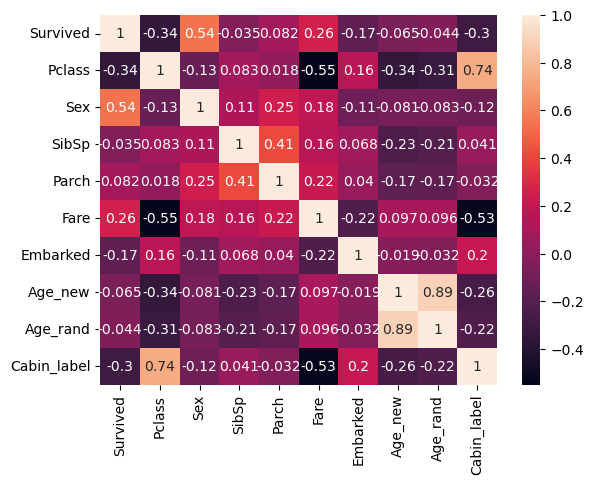

In [146]:
sns.heatmap(df.corr(), annot=True)